

> Import necessary Libraries



In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
df_train = pd.read_csv('cleaned_dataset_training_new_10th_nov.csv')
df_test1 = pd.read_csv('cleaned_dataset_new_test_10th_nov.csv')
df_test2 = pd.read_csv('cleaned_dataset_new_test2_10th_nov.csv')

In [ ]:
print(df_train.shape)
print(df_test1.shape)
print(df_test2.shape)

(8118, 7)
(2634, 7)
(9743, 7)


In [ ]:
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_train['Hour'] = df_train['Date'].dt.hour
df_train['DayOfWeek'] = df_train['Date'].dt.dayofweek
df_train = df_train.drop('Date', axis=1)

df_test1['Date'] = pd.to_datetime(df_test1['Date'])
df_test1['Hour'] = df_test1['Date'].dt.hour
df_test1['DayOfWeek'] = df_test1['Date'].dt.dayofweek
df_test1 = df_test1.drop('Date', axis=1)

df_test2['Date'] = pd.to_datetime(df_test2['Date'])
df_test2['Hour'] = df_test2['Date'].dt.hour
df_test2['DayOfWeek'] = df_test2['Date'].dt.dayofweek
df_test2 = df_test2.drop('Date', axis=1)

In [ ]:
X_train = df_train.drop('Occupancy', axis=1).values
y_train = df_train['Occupancy'].values
X_test1 = df_test1.drop('Occupancy', axis=1).values
y_test1 = df_test1['Occupancy'].values
X_test2 = df_test2.drop('Occupancy', axis=1).values
y_test2 = df_test2['Occupancy'].values


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test1)
X_test2_scaled = scaler.transform(X_test2)

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train_scaled, y_train)

LogisticRegression()

# **Logistic Regression Model**

In [ ]:
y_pred1 = logmodel.predict(X_test_scaled)
y_pred2 = logmodel.predict(X_test2_scaled)

Performance on Test Set 1: (doors closed)
Precision: 0.9460539460539461
Recall: 0.9978925184404637
F1 Score: 0.9712820512820514
Accuracy: 0.9787395596051632

Occupancy percentage:  38.00303720577069

Performance on Test Set 2:(doors opened)
Precision: 0.9721906923950057
Recall: 0.83642578125
F1 Score: 0.8992125984251969
Accuracy: 0.9605870881658627

Occupancy percentage:  18.08477881555989



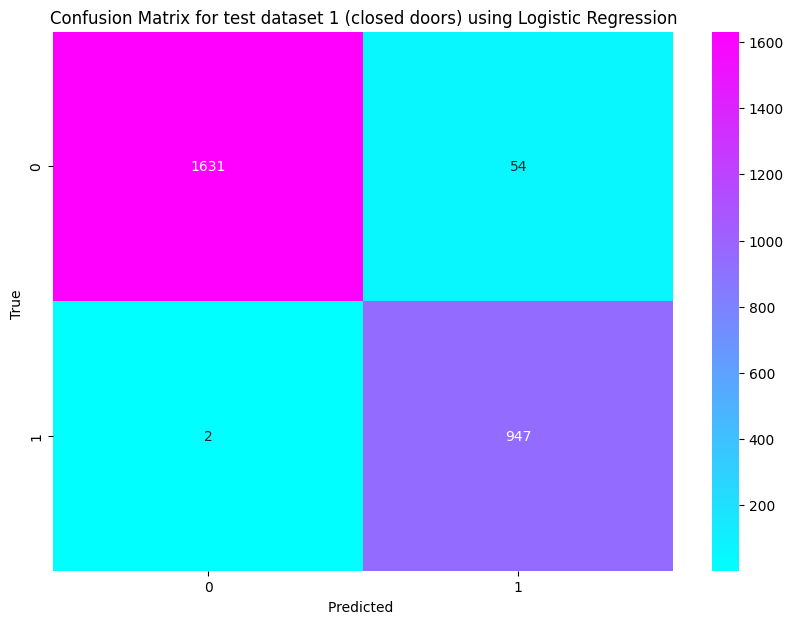

Text(95.72222222222221, 0.5, 'True ')

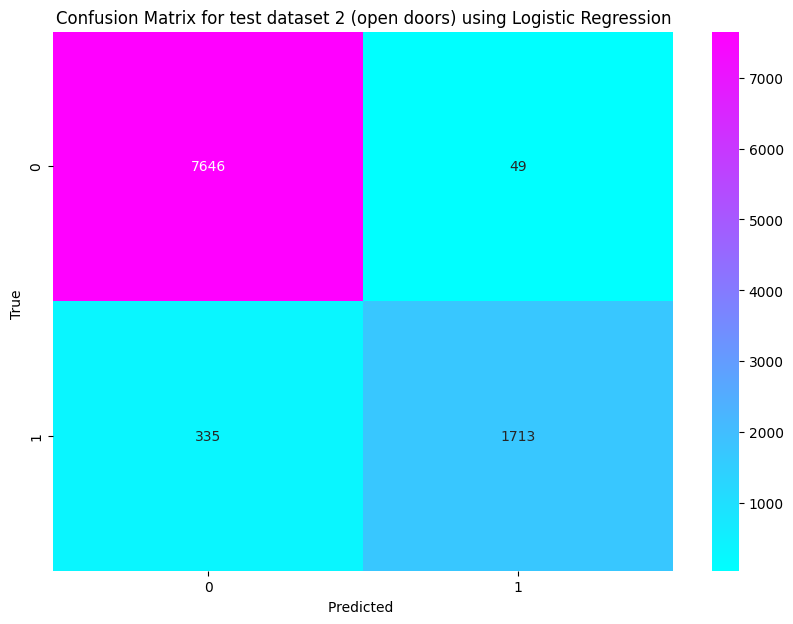

In [ ]:
print("Performance on Test Set 1: (doors closed)")
print(f"Precision: {precision_score(y_test1, y_pred1)}")
print(f"Recall: {recall_score(y_test1, y_pred1)}")
print(f"F1 Score: {f1_score(y_test1, y_pred1)}")
print(f"Accuracy: {accuracy_score(y_test1, y_pred1)}\n")
print(f"Occupancy percentage:  {(sum(y_pred1)/len(y_pred1))*100}\n")



print("Performance on Test Set 2:(doors opened)")
print(f"Precision: {precision_score(y_test2, y_pred2)}")
print(f"Recall: {recall_score(y_test2, y_pred2)}")
print(f"F1 Score: {f1_score(y_test2, y_pred2)}")
print(f"Accuracy: {accuracy_score(y_test2, y_pred2)}\n")
print(f"Occupancy percentage:  {(sum(y_pred2)/len(y_pred2))*100}\n")

cm_1 = confusion_matrix(y_test1, y_pred1)

# Plotting the confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm_1, annot=True, fmt='g', cmap='cool')
plt.title('Confusion Matrix for test dataset 1 (closed doors) using Logistic Regression')
plt.xlabel('Predicted ')
plt.ylabel('True ')
plt.show()

cm_2 = confusion_matrix(y_test2, y_pred2)

# Plotting the confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm_2, annot=True, fmt='g', cmap='cool')
plt.title('Confusion Matrix for test dataset 2 (open doors) using Logistic Regression')
plt.xlabel('Predicted ')
plt.ylabel('True ')

# **Naive Bayes Model**

In [ ]:
nbmodel = GaussianNB()

In [ ]:
nbmodel.fit(X_train_scaled,y_train)

GaussianNB()

In [ ]:
y_pred_nb1 = nbmodel.predict(X_test_scaled)
y_pred_nb2 = nbmodel.predict(X_test2_scaled)

Performance on Test Set 1: (doors closed)
Precision: 0.9458917835671342
Recall: 0.9947312961011591
F1 Score: 0.9696969696969696
Accuracy: 0.9776006074411542

Occupancy percentage:  37.889141989369776

Performance on Test Set 2:(doors opened)
Precision: 0.9486940298507462
Recall: 0.9931640625
F1 Score: 0.9704198473282443
Accuracy: 0.9872729138868932

Occupancy percentage:  22.005542440726675



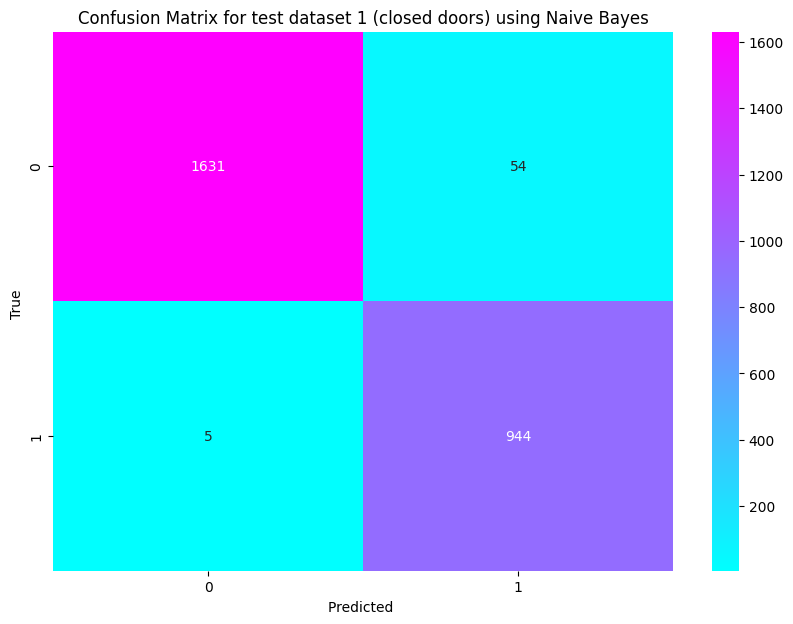

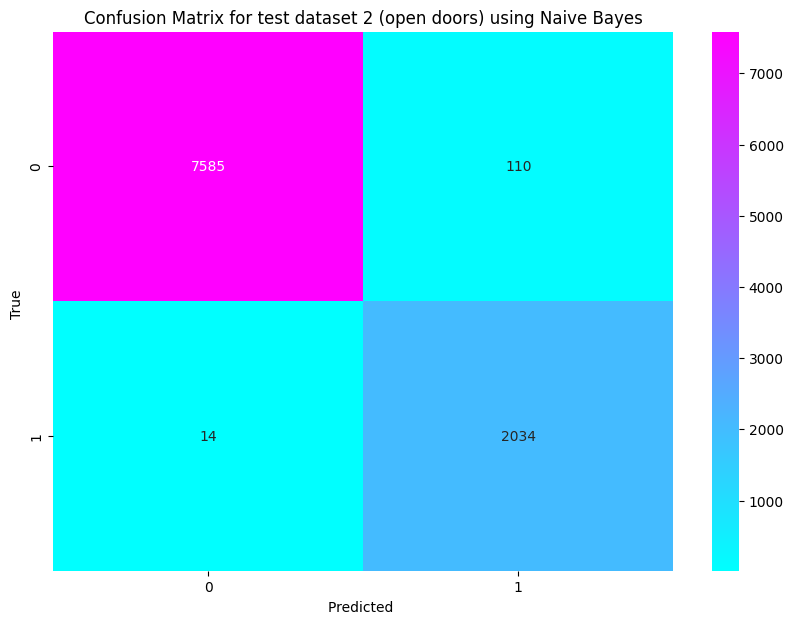

In [ ]:

print("Performance on Test Set 1: (doors closed)")
print(f"Precision: {precision_score(y_test1, y_pred_nb1)}")
print(f"Recall: {recall_score(y_test1, y_pred_nb1)}")
print(f"F1 Score: {f1_score(y_test1, y_pred_nb1)}")
print(f"Accuracy: {accuracy_score(y_test1, y_pred_nb1)}\n")
print(f"Occupancy percentage:  {(sum(y_pred_nb1)/len(y_pred_nb1))*100}\n")


print("Performance on Test Set 2:(doors opened)")
print(f"Precision: {precision_score(y_test2, y_pred_nb2)}")
print(f"Recall: {recall_score(y_test2, y_pred_nb2)}")
print(f"F1 Score: {f1_score(y_test2, y_pred_nb2)}")
print(f"Accuracy: {accuracy_score(y_test2, y_pred_nb2)}\n")
print(f"Occupancy percentage:  {(sum(y_pred_nb2)/len(y_pred_nb2))*100}\n")

cmnb_1 = confusion_matrix(y_test1, y_pred_nb1)

# Plotting the confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cmnb_1, annot=True, fmt='g', cmap='cool')
plt.title('Confusion Matrix for test dataset 1 (closed doors) using Naive Bayes')
plt.xlabel('Predicted ')
plt.ylabel('True ')
plt.show()

cmnb_2 = confusion_matrix(y_test2, y_pred_nb2)

# Plotting the confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cmnb_2, annot=True, fmt='g', cmap='cool')
plt.title('Confusion Matrix for test dataset 2 (open doors) using Naive Bayes')
plt.xlabel('Predicted ')
plt.ylabel('True ')
plt.show()

# **K- Nearest Neighbours Model**

Best k value : 15
Performance on Test Set 1: (doors closed)
Precision: 0.9419279907084785
Recall: 0.8545837723919916
F1 Score: 0.8961325966850829
Accuracy: 0.9286256643887624

Occupancy percentage:  32.687927107061505

Performance on Test Set 2:(doors opened)
Precision: 0.942380183091007
Recall: 0.8544921875
F1 Score: 0.8962868117797695
Accuracy: 0.9584316945499333

Occupancy percentage:  19.05983783228985



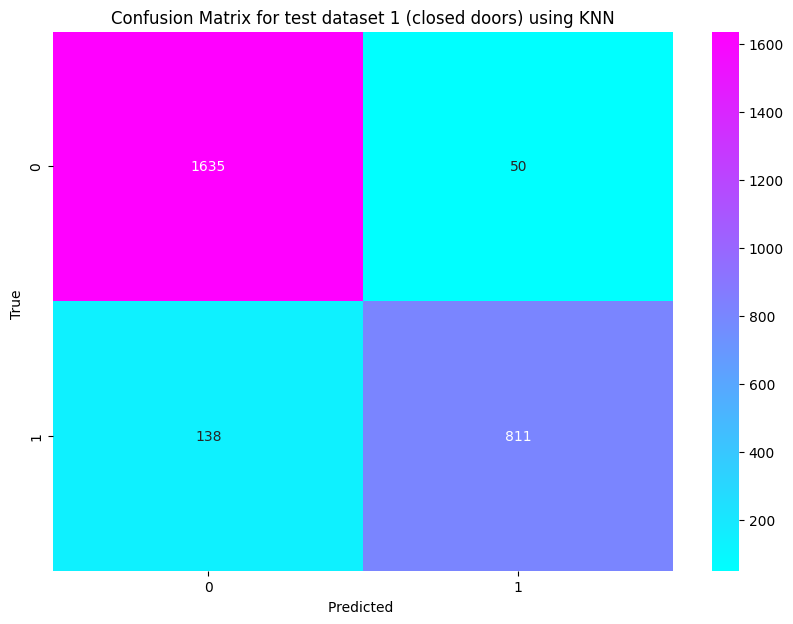

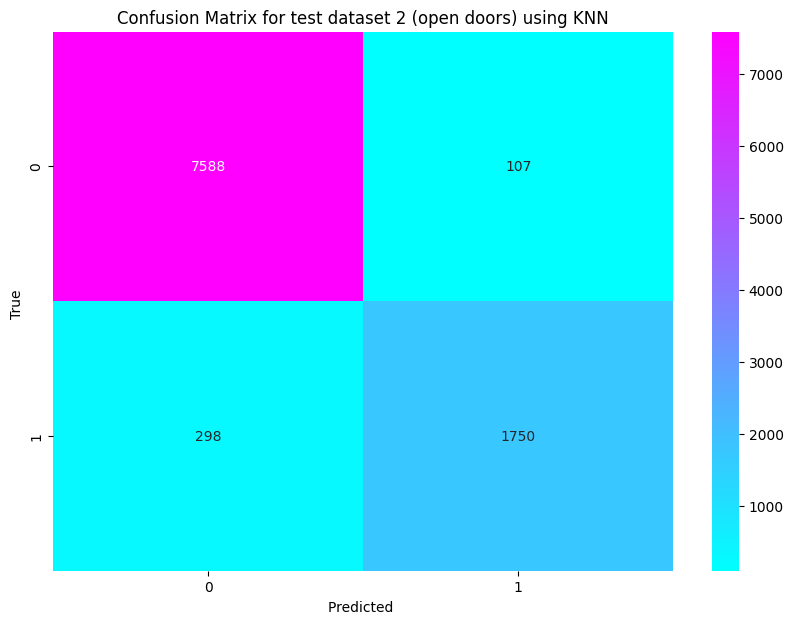

In [ ]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3,5,7,9,11,13,15]}
grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
best_k = grid_search.best_params_['n_neighbors']

print(f"Best k value : {best_k}")

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)

y_pred1 = knn.predict(X_test_scaled)
print("Performance on Test Set 1: (doors closed)")
print(f"Precision: {precision_score(y_test1, y_pred1)}")
print(f"Recall: {recall_score(y_test1, y_pred1)}")
print(f"F1 Score: {f1_score(y_test1, y_pred1)}")
print(f"Accuracy: {accuracy_score(y_test1, y_pred1)}\n")
print(f"Occupancy percentage:  {(sum(y_pred1)/len(y_pred1))*100}\n")

y_pred2 = knn.predict(X_test2_scaled)
print("Performance on Test Set 2:(doors opened)")
print(f"Precision: {precision_score(y_test2, y_pred2)}")
print(f"Recall: {recall_score(y_test2, y_pred2)}")
print(f"F1 Score: {f1_score(y_test2, y_pred2)}")
print(f"Accuracy: {accuracy_score(y_test2, y_pred2)}\n")
print(f"Occupancy percentage:  {(sum(y_pred2)/len(y_pred2))*100}\n")

cm_1_knn = confusion_matrix(y_test1, y_pred1)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_1_knn, annot=True, fmt='g', cmap='cool')
plt.title('Confusion Matrix for test dataset 1 (closed doors) using KNN')
plt.xlabel('Predicted ')
plt.ylabel('True ')
plt.show()

cm_2_knn = confusion_matrix(y_test2, y_pred2)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_2_knn, annot=True, fmt='g', cmap='cool')
plt.title('Confusion Matrix for test dataset 2 (open doors) using KNN')
plt.xlabel('Predicted ')
plt.ylabel('True ')
plt.show()

# **Random Forest Model**

Performance on Test Set 1: (doors closed)
Precision: 0.9437367303609342
Recall: 0.9367755532139094
F1 Score: 0.9402432575356954
Accuracy: 0.9570994684889901

Occupancy percentage:  35.7630979498861

Performance on Test Set 2:(doors opened)
Precision: 0.9109712230215827
Recall: 0.9892578125
F1 Score: 0.948501872659176
Accuracy: 0.9774196859283588

Occupancy percentage:  22.82664477060454



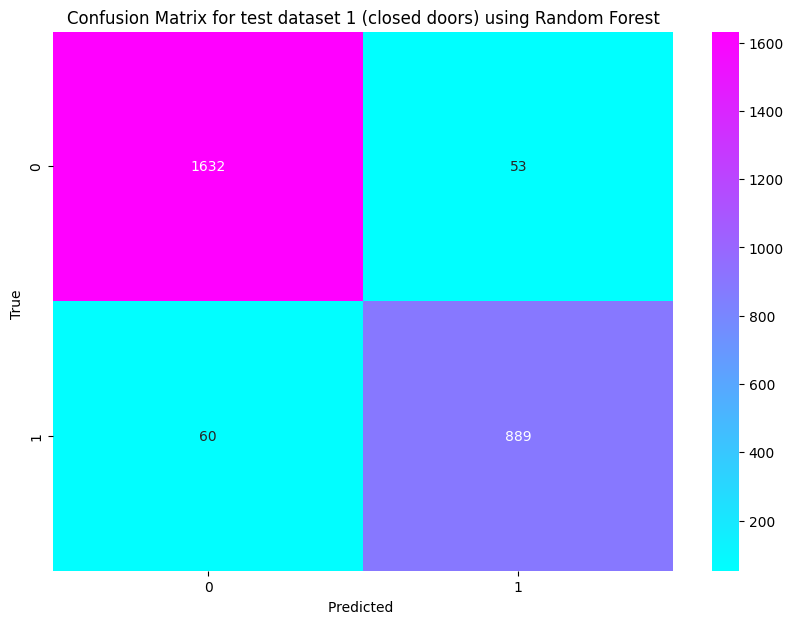

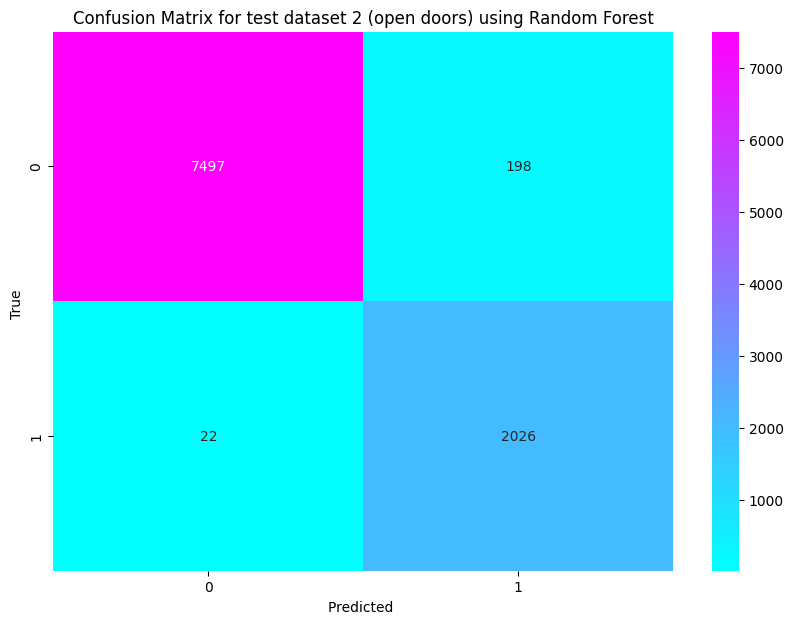

In [ ]:
randomForest = RandomForestClassifier(n_estimators=100, random_state=42)
randomForest.fit(X_train_scaled, y_train)


y_pred1 = randomForest.predict(X_test_scaled)
print("Performance on Test Set 1: (doors closed)")
print(f"Precision: {precision_score(y_test1, y_pred1)}")
print(f"Recall: {recall_score(y_test1, y_pred1)}")
print(f"F1 Score: {f1_score(y_test1, y_pred1)}")
print(f"Accuracy: {accuracy_score(y_test1, y_pred1)}\n")
print(f"Occupancy percentage:  {(sum(y_pred1)/len(y_pred1))*100}\n")


y_pred2 = randomForest.predict(X_test2_scaled)
print("Performance on Test Set 2:(doors opened)")
print(f"Precision: {precision_score(y_test2, y_pred2)}")
print(f"Recall: {recall_score(y_test2, y_pred2)}")
print(f"F1 Score: {f1_score(y_test2, y_pred2)}")
print(f"Accuracy: {accuracy_score(y_test2, y_pred2)}\n")
print(f"Occupancy percentage:  {(sum(y_pred2)/len(y_pred2))*100}\n")

cm_1 = confusion_matrix(y_test1, y_pred1)

# Plotting the confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm_1, annot=True, fmt='g', cmap='cool')
plt.title('Confusion Matrix for test dataset 1 (closed doors) using Random Forest')
plt.xlabel('Predicted ')
plt.ylabel('True ')
plt.show()

cm_2 = confusion_matrix(y_test2, y_pred2)

# Plotting the confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm_2, annot=True, fmt='g', cmap='cool')
plt.title('Confusion Matrix for test dataset 2 (open doors) using Random Forest')
plt.xlabel('Predicted ')
plt.ylabel('True ')
plt.show()

# **Support Vector Machine**

In [ ]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)
y_pred1 = svm_model.predict(X_test_scaled)
print("Performance on Test Set 1 (Closed Doors):")
print(f"Precision: {precision_score(y_test1, y_pred1):}")
print(f"Recall: {recall_score(y_test1, y_pred1):}")
print(f"F1 Score: {f1_score(y_test1, y_pred1):}")
print(f"Accuracy: {accuracy_score(y_test1, y_pred1):}")
print(f"Occupancy percentage : {(sum(y_pred1)/len(y_pred1))*100}\n")


y_pred2 = svm_model.predict(X_test2_scaled)
print("Performance on Test Set 2 (Opened doors):")
print(f"Precision: {precision_score(y_test2, y_pred2):}")
print(f"Recall: {recall_score(y_test2, y_pred2):}")
print(f"F1 Score: {f1_score(y_test2, y_pred2):}")
print(f"Accuracy: {accuracy_score(y_test2, y_pred2):}")
print(f"Occupancy percentage_2 : {(sum(y_pred2)/len(y_pred2))*100}\n")


Performance on Test Set 1 (Closed Doors):
Precision: 0.9461615154536391
Recall: 1.0
F1 Score: 0.9723360655737705
Accuracy: 0.979498861047836
Occupancy percentage : 38.07896735003797

Performance on Test Set 2 (Opened doors):
Precision: 0.976303317535545
Recall: 0.9052734375
F1 Score: 0.9394476817836331
Accuracy: 0.9754695678948989
Occupancy percentage_2 : 19.490916555475728



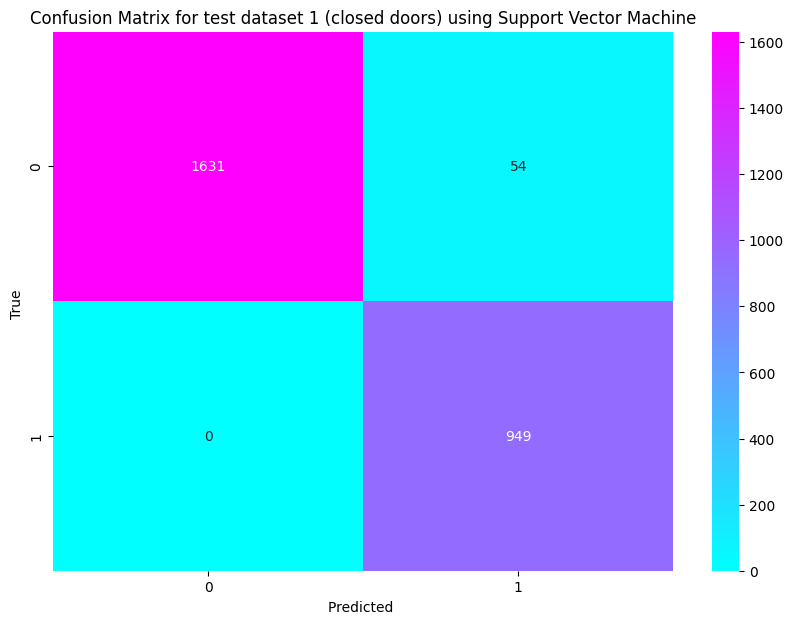

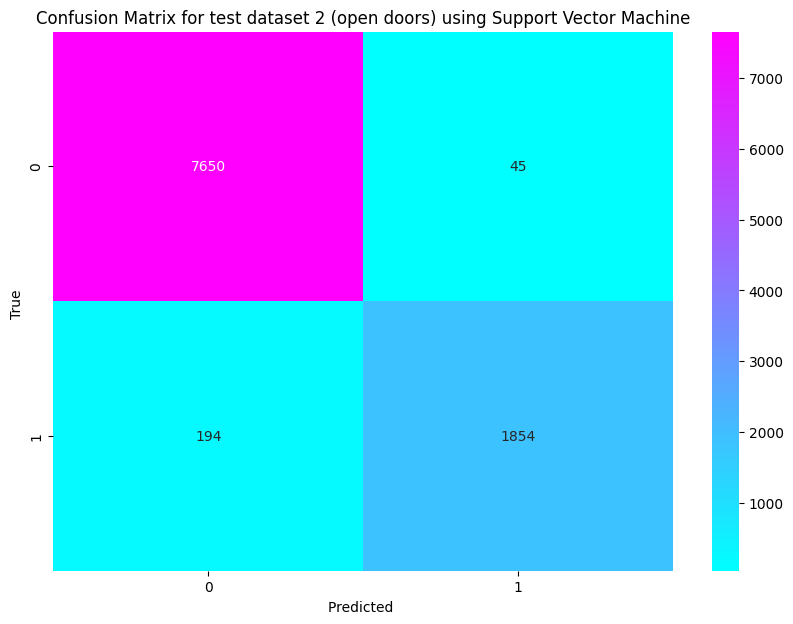

In [ ]:
cm_1 = confusion_matrix(y_test1, y_pred1)

# Plotting the confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm_1, annot=True, fmt='g', cmap='cool')
plt.title('Confusion Matrix for test dataset 1 (closed doors) using Support Vector Machine')
plt.xlabel('Predicted ')
plt.ylabel('True ')
plt.show()

cm_2 = confusion_matrix(y_test2, y_pred2)

# Plotting the confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm_2, annot=True, fmt='g', cmap='cool')
plt.title('Confusion Matrix for test dataset 2 (open doors) using Support Vector Machine')
plt.xlabel('Predicted ')
plt.ylabel('True ')
plt.show()

# **Gradient Boost Model**

In [ ]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_scaled, y_train)
y_pred1 = gb_model.predict(X_test_scaled)
print("Performance on Test Set 1 ( closed door ):")
print(f"Precision: {precision_score(y_test1, y_pred1):}")
print(f"Recall: {recall_score(y_test1, y_pred1):}")
print(f"F1 Score: {f1_score(y_test1, y_pred1):}")
print(f"Accuracy ( closed doors ): {accuracy_score(y_test1, y_pred1):}")
print(f"Occupancy percentage : {(sum(y_pred1)/len(y_pred1))*100}\n")

# Predictions and Performance on Test Set 2
y_pred2 = gb_model.predict(X_test2_scaled)
print("Performance on Test Set 2 ( Open Door ):")
print(f"Precision: {precision_score(y_test2, y_pred2):}")
print(f"Recall: {recall_score(y_test2, y_pred2):}")
print(f"F1 Score: {f1_score(y_test2, y_pred2):}")
print(f"Accuracy (opened doors ): {accuracy_score(y_test2, y_pred2):}")
print(f"Occupancy percentage : {(sum(y_pred2)/len(y_pred2))*100}\n")

Performance on Test Set 1 ( closed door ):
Precision: 0.9403508771929825
Recall: 0.8472075869336143
F1 Score: 0.8913525498891353
Accuracy ( closed doors ): 0.9255884586180714
Occupancy percentage : 32.46013667425968

Performance on Test Set 2 ( Open Door ):
Precision: 0.9506522972206466
Recall: 0.818359375
F1 Score: 0.8795591708213066
Accuracy (opened doors ): 0.9528892538232577
Occupancy percentage : 18.095042594683363



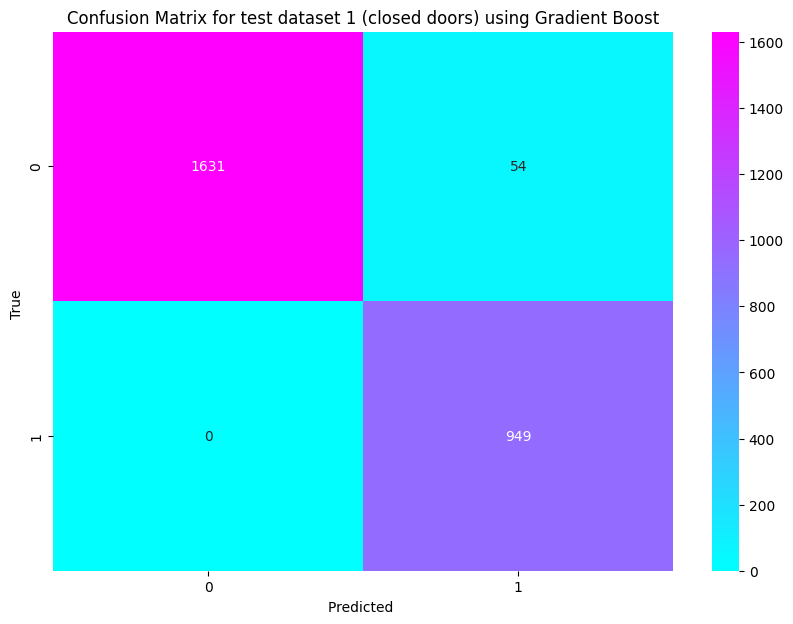

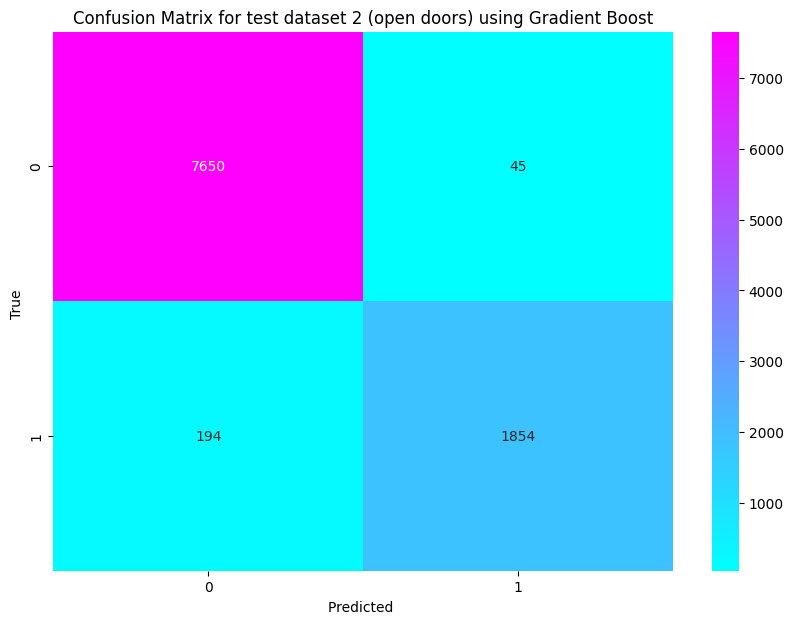

In [ ]:
cm_1 = confusion_matrix(y_test1, y_pred1)

# Plotting the confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm_1, annot=True, fmt='g', cmap='cool')
plt.title('Confusion Matrix for test dataset 1 (closed doors) using Gradient Boost')
plt.xlabel('Predicted ')
plt.ylabel('True ')
plt.show()

cm_2 = confusion_matrix(y_test2, y_pred2)

# Plotting the confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm_2, annot=True, fmt='g', cmap='cool')
plt.title('Confusion Matrix for test dataset 2 (open doors) using Gradient Boost')
plt.xlabel('Predicted ')
plt.ylabel('True ')
plt.show()